In [3]:
# Load all necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Clean overdose_deaths

In [4]:
# Read in the deathrate 
ods = pd.read_csv("overdose_deaths.txt", sep='\t', lineterminator='\r')
print(ods.dtypes) 

# Get rid of the notes at the bottom of the txt file 
ods = ods.iloc[:15896]

# Get rid of the unnecessary column 
ods = ods.drop(["Notes", "Year Code"], axis=1) 


# Add an abbreviated states columns 
new_col = ods['County'].str.split(', ').str[1] 
ods.insert(loc=2, column='State Abv', value=new_col)

# Get rid of the States in the County column
# ods['County'] = ods['County'].str.split(',').str[0] 
## should not take out state abv from county names because there are repeating county names 


# Add a cruder rate column 
ods['Cruder Rate'] = ods['Deaths'] / ods['Population'] * 100000

# Add a deathrate per 100 people column 
ods['Deathrate per 100'] = 100 / ods['Population'] * ods['Deaths']
ods

Notes           object
Year           float64
Year Code      float64
State           object
State Code     float64
County          object
County Code    float64
Deaths         float64
Population     float64
Crude Rate      object
dtype: object


Year      State State Abv  State Code                 County  \
0      1999.0    Alabama        AL         1.0     Baldwin County, AL   
1      1999.0    Alabama        AL         1.0   Jefferson County, AL   
2      1999.0    Alabama        AL         1.0     Madison County, AL   
3      1999.0    Alabama        AL         1.0      Mobile County, AL   
4      1999.0     Alaska        AK         2.0  Anchorage Borough, AK   
...       ...        ...       ...         ...                    ...   
15891  2020.0  Wisconsin        WI        55.0   Winnebago County, WI   
15892  2020.0  Wisconsin        WI        55.0        Wood County, WI   
15893  2020.0    Wyoming        WY        56.0     Laramie County, WY   
15894  2020.0    Wyoming        WY        56.0     Natrona County, WY   
15895  2020.0    Wyoming        WY        56.0  Sweetwater County, WY   

       County Code  Deaths  Population  Crude Rate  Cruder Rate  \
0           1003.0    11.0    137555.0  Unreliable     7.996801   
1           1073.0    34.0    662845.0        5.13     5.129404   
2           1089.0    10.0    274693.0  Unreliable     3.640428   
3           1097.0    28.0    399323.0        7.01     7.011868   
4           2020.0    21.0    259348.0        8.10     8.097228   
...            ...     ...         ...         ...          ...   
15891      55139.0    38.0    171631.0       22.14    22.140522   
15892      55141.0    18.0     72560.0  Unreliable    24.807056   
15893      56021.0    17.0    100595.0  Unreliable    16.899448   
15894      56025.0    16.0     80815.0  Unreliable    19.798305   
15895      56037.0    15.0     42673.0  Unreliable    35.151032   

       Deathrate per 100  
0               0.007997  
1               0.005129  
2               0.003640  
3               0.007012  
4               0.008097  
...                  ...  
15891           0.022141  
15892           0.024807  
15893           0.016899  
15894           0.019798  
15895           0.035151  

[15896 rows x 11 columns]

In [5]:
#### Write our cleaned data set to a csv
# # import os  
# # os.makedirs('Capstone 222', exist_ok=True)  
# ods.to_csv('od_deaths.csv') 

### EDA 

In [6]:
# Confirm that there are no missing values in our df 
print(ods.isnull().values.any()) 
# False so we're good :D 

False


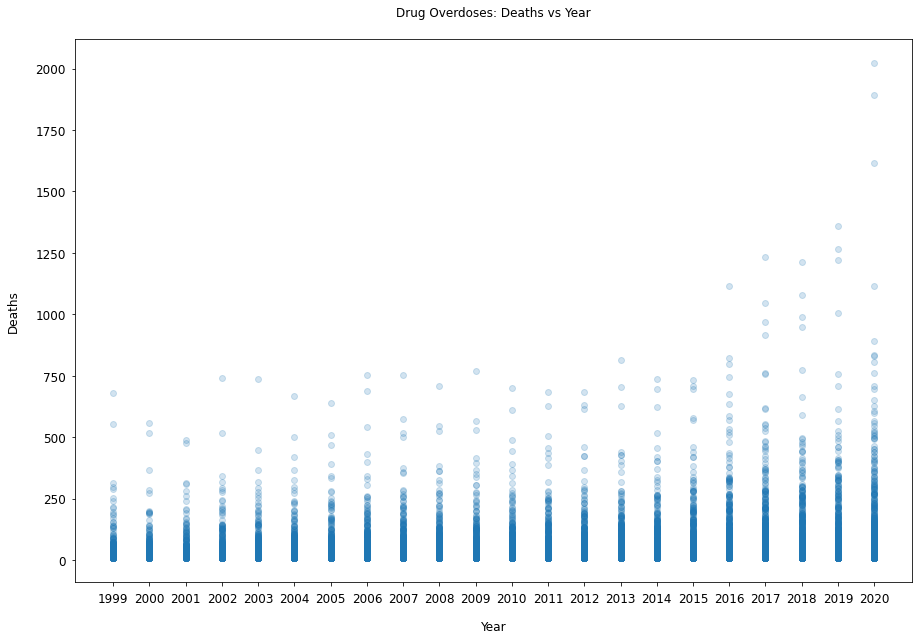

In [7]:
# 
xint = range(int(min(ods['Year'])), int(max(ods['Year']))+1)

fig, ax = plt.subplots(figsize=(15,10)) 
plt.scatter(ods['Year'], ods['Deaths'], alpha=0.2)
plt.title("Drug Overdoses: Deaths vs Year", y=1.03)
plt.xlabel("Year", fontsize=12, labelpad=15)
plt.ylabel("Deaths", fontsize=12, labelpad=15)
plt.xticks(xint); # Clearly label the x axis 
plt.tick_params(labelsize=12, pad=6); 

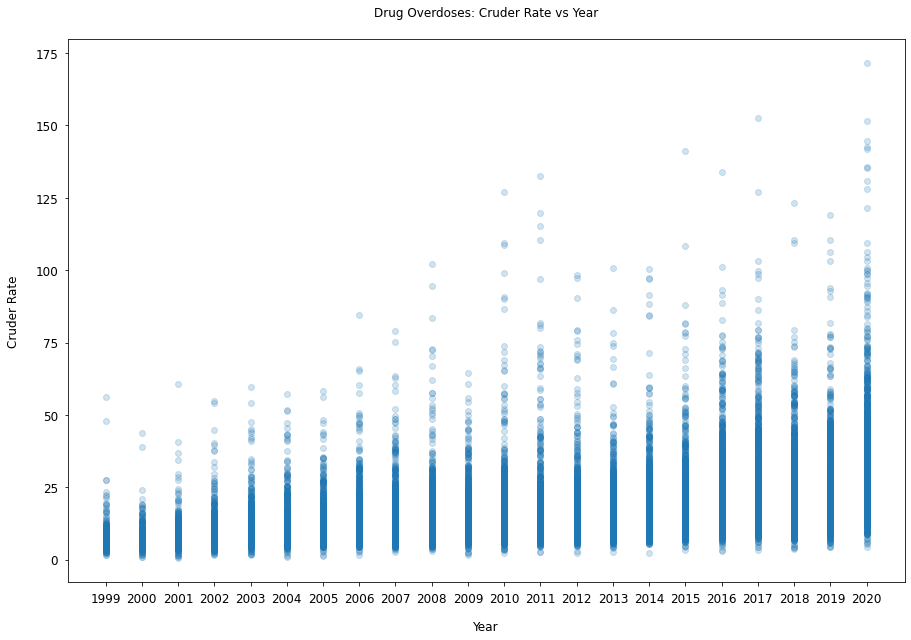

In [8]:
# 
xint = range(int(min(ods['Year'])), int(max(ods['Year']))+1)

fig, ax = plt.subplots(figsize=(15,10)) 
plt.scatter(ods['Year'], ods['Cruder Rate'], alpha=0.2)
plt.title("Drug Overdoses: Cruder Rate vs Year", y=1.03)
plt.xlabel("Year", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.xticks(xint); # Clearly label the x axis 
plt.tick_params(labelsize=12, pad=6); 

### Analyze by Year

In [9]:
# Analyze the deathrate by year 
ods_year = ods.groupby("Year")
ods_year_count = ods_year.count()['County']
ods_year_sums = ods_year.sum()  
ods_year_means = ods_year.mean()
years = ods_year_means.index.values 


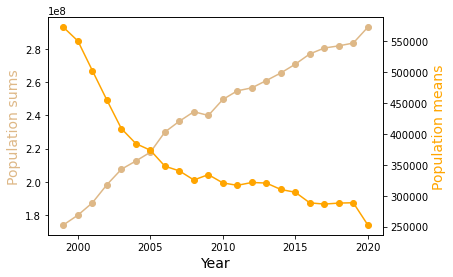

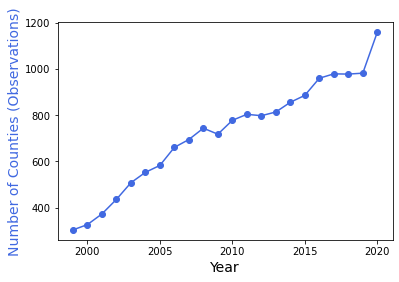

In [10]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, ods_year_sums['Population'], label = "line 1", color='burlywood', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Population sums",color="burlywood",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, ods_year_means['Population'], label = "line 2", color='orange', marker='o')
ax2.set_ylabel("Population means",color="orange",fontsize=14)
plt.show()




# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, ods_year_count, label = "line 1", color='royalblue', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Number of Counties (Observations)",color="royalblue",fontsize=14);

Population means decrease while population sums increase throughout the years because the number of  observations increase, meaning we are adding more counties with lower population counts throughout the years. 

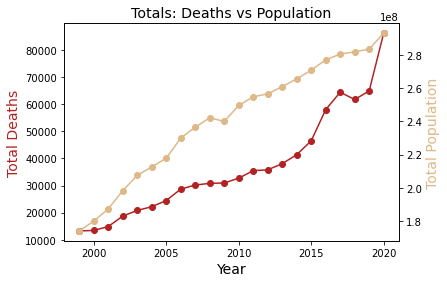

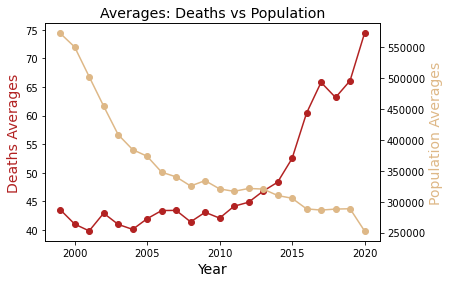

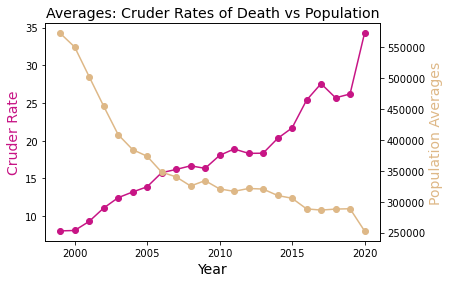

In [11]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, ods_year_sums['Deaths'], label = "line 1", color='firebrick', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Total Deaths",color="firebrick",fontsize=14)
ax.set_title("Totals: Deaths vs Population", fontsize=14.2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, ods_year_sums['Population'], label = "line 2", color='burlywood', marker='o')
ax2.set_ylabel("Total Population",color="burlywood",fontsize=14)

plt.show()



# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, ods_year_means['Deaths'], label = "line 1", color='firebrick', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Deaths Averages",color="firebrick",fontsize=14)
ax.set_title("Averages: Deaths vs Population", fontsize=14.2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, ods_year_means['Population'], label = "line 2", color='burlywood', marker='o')
ax2.set_ylabel("Population Averages",color="burlywood",fontsize=14)
plt.show()




# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, ods_year_means['Cruder Rate'], label = "line 1", color='mediumvioletred', marker='o')
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-baxis label
ax.set_ylabel("Cruder Rate",color="mediumvioletred",fontsize=14)
ax.set_title("Averages: Cruder Rates of Death vs Population", fontsize=14.2)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, ods_year_means['Population'], label = "line 2", color='burlywood', marker='o')
ax2.set_ylabel("Population Averages",color="burlywood",fontsize=14)
plt.show()

This means something. 

### Analyze overall

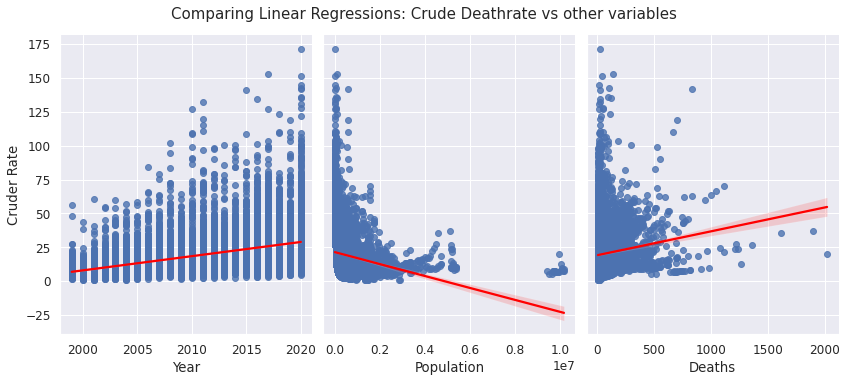

In [12]:
sns.set(font_scale=1.1)
pp = sns.pairplot(ods, x_vars=['Year', 'Population', 'Deaths'], 
             y_vars=["Cruder Rate"],
             height=5, aspect=.8, kind="reg",
             plot_kws={'line_kws':{'color':'red'}});
pp.fig.suptitle("Comparing Linear Regressions: Crude Deathrate vs other variables", 
                y=1.05, size=15);

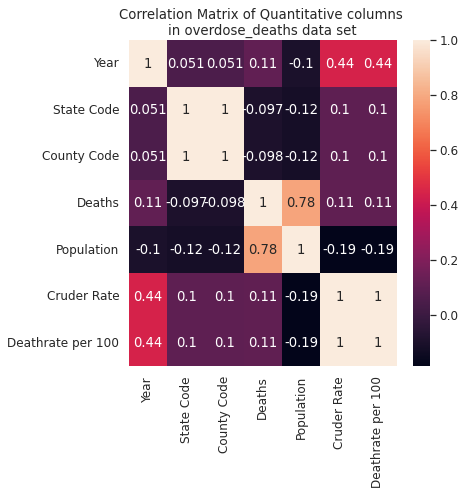

In [13]:
# Filter the dataframe to appropriate columns 
ods_corrcols = ods[['Year', 'State Code', 'County Code', 'Deaths', 'Population', 
                    'Cruder Rate', 'Deathrate per 100']]

# Make the plot bigger 
fig, ax = plt.subplots(figsize=(6,6)) 

correlation_mat = ods_corrcols.corr()
sns.heatmap(correlation_mat, annot = True, ax=ax)
plt.title("Correlation Matrix of Quantitative columns \nin overdose_deaths data set")
plt.show()

Deaths and Population have the highest correlation (0.78) 

Year and Cruder Rate are kind of correlated (0.44) 

Cruder Rate and Population are verrryy slightly negatively correlated 

Year and Population are also slightly negativly correlated bc of the increase in observations ;u; 

### Analyze by County 

In [14]:
# Analyze the deathrate by county  
ods_county = ods.groupby("County")
ods_county_count = ods_county.count()[['Year']]
ods_county_sums = ods_county.sum()  
ods_county_means = ods_county.mean() 
counties = ods_county_means.index.values 

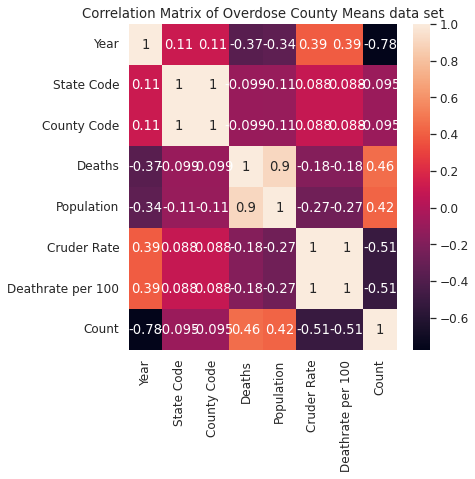

In [15]:
ods_county_means['Count'] = np.array(ods_county_count)
ods_county_means

# Make the plot bigger 
fig, ax = plt.subplots(figsize=(6,6)) 

correlation_mat = ods_county_means.corr()
sns.heatmap(correlation_mat, annot = True, ax=ax)
plt.title("Correlation Matrix of Overdose County Means data set")
plt.show()

There is much more correlation within the county means than there is in the overall data set? 

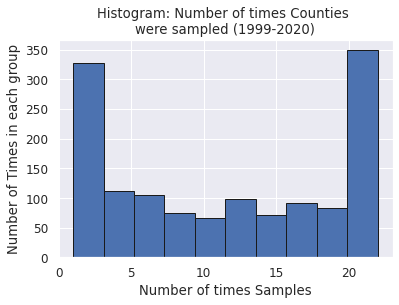

In [16]:
fig, ax = plt.subplots()
plt.xlabel("Number of times Samples")
plt.ylabel("Number of Times in each group")
plt.title("Histogram: Number of times Counties \nwere sampled (1999-2020)") 
plt.hist(ods_county_count, ec="k"); 

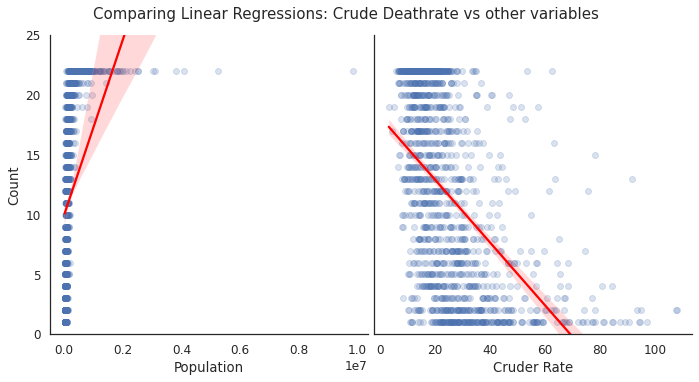

In [17]:
sns.set(font_scale=1.1)
sns.set_style("white")
pp = sns.pairplot(ods_county_means, x_vars=['Population', 'Cruder Rate'], \
             y_vars=["Count"],
             height=5, aspect=1, kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})
pp.axes[0,0].set_ylim(0,25)

pp.fig.suptitle("Comparing Linear Regressions: Crude Deathrate vs other variables", 
                y=1.05, size=15);

Trying to see if they sampled counties with higher rates or higher populations

In [18]:
#### MAP PLOT THE STATES WITH THE HIGHEST CRUDER RATE ???



In [19]:
#### PLOT THE MOST SAMPLED COUNTIES ???
# np.sort(ods_county_count)
# ods_county_count.sort_values('Year').tail(40)


# ods_county_count.tail(10)

In [20]:
# np.array(ods_county_means_sorted['Cruder Rate'])

In [21]:
# ods_county_means_sorted = ods_county_means.sort_values('Cruder Rate')
# ods_county_means_sorted

### Maps! :D 

In [29]:
# pip install plotly-geo

Note: you may need to restart the kernel to use updated packages.


In [31]:
import geopandas 
import shapely
import shapefile
import plotly
# import plotly-geo
import plotly.figure_factory as ff

In [24]:
import warnings
warnings.filterwarnings("ignore") # haha ^^: 

In [32]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, int(max(ods_county_means['Cruder Rate']))+1, len(colorscale) - 1))
fips = ods_county_means['County Code'].tolist()
values = ods_county_means['Cruder Rate'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Average Overdose Rates by County (1999-2020)',
    legend_title='Avg Overdose Cruder Rates'
)

fig.layout.template = None
fig.show()

In [33]:
ods_2020 = ods.loc[ods['Year'] == 2020]

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, int(max(ods_2020['Cruder Rate']))+1, len(colorscale) - 1))
fips = ods_2020['County Code'].tolist()
values = ods_2020['Cruder Rate'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Overdose Rates by County in 2020',
    legend_title='Overdose Cruder Rates'
)

fig.layout.template = None
fig.show()

In [31]:
print(len(ods_county_means['Cruder Rate']))
print(len(ods_2020))

1379
1159


Note: Since the observations change throughout the years, we see more counties colored in. 
We have the most observations (1159) in 2020. But there are 3,006 counties in total in the US so we have a lot of missing counties on our plot. 



In [34]:
### MAP WEST VIRIGINA ### 
ods_county_means_WV = ods_county_means.loc[ods_county_means['State Code'] == 54]

ods_county_means_WV = ods_county_means.loc[ods_county_means['State Code'] == 54]

values = ods_county_means_WV['Cruder Rate'].tolist()
fips = ods_county_means_WV['County Code'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#ebf3fb","#deebf7","#c6dbef","#b3d2e9",
              "#85bcdb","#6baed6","#4292c6","#3082be","#1361a9",
              "#08519c","#08306b", "#030512"]

# colorscale = ["#a6c6e1","#639bcb","#2171b5", "#1d65a2","#2171b5", "#174f7e", "#10385a", "#0d2d48"]

# colorscale = ["#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

endpts = list(np.linspace(1, int(max(ods_2020['Cruder Rate']))+1, len(colorscale) - 1))
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['West Virginia'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(245,245,245)',
    paper_bgcolor='rgb(245,245,245)',
    legend_title='Mean of Cruder Rates by County',
    county_outline={'color': 'rgb(245,245,245)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show() 

Note: We only have 31 our of 55 West Virginian counties. 
They also have been samples unevenly throughout the years. 

(It's hard to manipulate colors with this version of plotly. 
Might use this instead later: https://plotly.com/python/mapbox-county-choropleth/) 

In [52]:
### PLOT MULTIPLE STATES ???

# # high_rate_states = ['West Virginia', 'Virginia', 'Ohio', 'Pennsylvania', 'Maryland', 'Kentucky']
# df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
# df_sample_r = df_sample[df_sample['STNAME'].isin(NE_states)]

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# colorscale = [
#     'rgb(68.0, 1.0, 84.0)',
#     'rgb(66.0, 64.0, 134.0)',
#     'rgb(38.0, 130.0, 142.0)',
#     'rgb(63.0, 188.0, 115.0)',
#     'rgb(216.0, 226.0, 25.0)'
# ]

# fig = ff.create_choropleth(
#     fips=fips, values=values,
#     scope=high_rate_states, county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     legend_title='Population per county'

# )
# fig.update_layout(
#     legend_x = 0,
#     annotations = {'x': -0.12, 'xanchor': 'left'}
# )

# fig.layout.template = None
# fig.show()

### Analyze by State

In [37]:
# Analyze the deathrate by year 
ods_state = ods.groupby("State Abv")
ods_state_count = ods_state.count()['County']
ods_state_sums = ods_state.sum()  
ods_state_means = ods_state.mean() 
# years = ods_year_means.index.values 
# ods_state_means.head()


In [38]:
# Adding State Abbreviations as column to make compatible with plotly.express 
state_abvs = pd.Series(ods_state_means.index)
ods_state_means = ods_state_means.reset_index(drop=True)
ods_state_means.insert(0, "State Abv", state_abvs)
ods_state_means.head()

State Abv         Year  State Code  County Code      Deaths     Population  \
0        AK  2011.185714         2.0  2094.342857   24.728571  146103.171429   
1        AL  2012.307692         1.0  1076.589744   28.330128  189323.913462   
2        AR  2011.925532         5.0  5082.021277   20.611702  150765.489362   
3        AZ  2010.473430         4.0  4015.130435  114.086957  639328.922705   
4        CA  2010.071594         6.0  6060.944573  101.562356  921107.469977   

   Cruder Rate  Deathrate per 100  
0    17.526542           0.017527  
1    17.180087           0.017180  
2    15.995062           0.015995  
3    18.322286           0.018322  
4    15.272121           0.015272

In [39]:
import plotly.express as px

In [40]:
fig = px.choropleth(ods_state_means,  # Input Pandas DataFrame
                    locations="State Abv",  # DataFrame column with locations
                    color="Cruder Rate",  # DataFrame column with color values
                    hover_name="State Abv", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale=px.colors.sequential.Purpor) 
                        # greys, Purpor, amp, Brwnyl, dense, Sunsetdark, Blues
# More colors: https://plotly.com/python/builtin-colorscales/
fig.update_layout(
    title_text = 'Overdose Cruder Rate Averages by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [41]:
fig = px.choropleth(ods_state_means,  # Input Pandas DataFrame
                    locations="State Abv",  # DataFrame column with locations
                    color="Deaths",  # DataFrame column with color values
                    hover_name="State Abv", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale=px.colors.sequential.amp) # Purpor, amp, Brwnyl, dense, Sunsetdark, Blues
# More colors: https://plotly.com/python/builtin-colorscales/
fig.update_layout(
    title_text = 'Average Overdose Deaths by State (1999-2020)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [42]:
fig = px.choropleth(ods_state_means,  # Input Pandas DataFrame
                    locations="State Abv",  # DataFrame column with locations
                    color="Population",  # DataFrame column with color values
                    hover_name="State Abv", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale=px.colors.sequential.Brwnyl) # Purpor, amp, Brwnyl, dense, Sunsetdark, Blues
# More colors: https://plotly.com/python/builtin-colorscales/
fig.update_layout(
    title_text = 'Average Population by State (1999-2020)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [71]:
##### attempts to get create_choropleth to work ##### 

# pip install plotly-geo
# !pip install geopandas==0.3.0
# !pip install pyshp==1.2.10
# !pip install shapely==1.6.3
# print(shapely.__version__)
# pip install example --use-feature=2020-resolver
### pip install plotly-geo
# conda update --all
# conda search -f geopandas
# conda install geopandas=0.8.1